In [1]:
import sys
sys.path.insert(3,"../pre-processing/3D")
sys.path.insert(1,"../numerical_analysis")
sys.path.insert(2,"../analytical")
sys.path.insert(5,"../post-processing")
import numpy as np
from dolfin import *
import matplotlib.pyplot as plt
import epilysis3D_functions as ep3f
import epilysis_3D
import store
import post_3D

In [2]:
meshes_location = "../meshes"
paraview_location = "../paraview"
results_location = "../results"

In [3]:
def error_char_length(E,nu,vol_frac,error,j):
    for i,name in enumerate([str('{:0.2f}'.format(vol_frac))[2:]+"length_25",str('{:0.2f}'.format(vol_frac))[2:]+"length_23",str('{:0.2f}'.format(vol_frac))[2:]+"length_20",str('{:0.2f}'.format(vol_frac))[2:]+"length_18",str('{:0.2f}'.format(vol_frac))[2:]+"length_16",str('{:0.2f}'.format(vol_frac))[2:]+"length_15",str('{:0.2f}'.format(vol_frac))[2:]+"length_12",str('{:0.2f}'.format(vol_frac))[2:]+"length_11",str('{:0.2f}'.format(vol_frac))[2:]+"length_10",str('{:0.2f}'.format(vol_frac))[2:]+"length_09",str('{:0.2f}'.format(vol_frac))[2:]+"length_07",str('{:0.2f}'.format(vol_frac))[2:]+"length_05",str('{:0.2f}'.format(vol_frac))[2:]+"length_04",str('{:0.2f}'.format(vol_frac))[2:]+"length_03"]):
        store.save_name(name,results_location) #save the name for the post-processing!!!
        #-------------------------------------------------------------------------
        #-------------------------------------------------------------------------
        mesh = Mesh(meshes_location+"/gmsh/" + name + ".xml")
        subdomains = MeshFunction("size_t", mesh, meshes_location+"/gmsh/" + name + "_physical_region.xml")
        a=1
        b=1
        c=1
        vertices = np.array([[0, 0.,0.],#0
                             [a, 0.,0.],#1
                             [a,0.,c],#2
                             [0.,0.,c],#3
                             [0.,b,c],#4
                             [0.,b,0.],#5
                             [a,b,0.],#6
                             [a,b,c]])#7
        vol = a*b*c
        Exx,Eyy,Ezz,Gxy,Gzx,Gyz,nuxy,nuzx,nuyz = ep3f.ortho_from_iso(E,nu)
        store.save_E_nu_iso(name,E,nu,results_location) #save E,nu for the post-processing!!!
        #-------------------------------------------------------------------------
        dx,w,Eps,F,a,L = epilysis_3D.fe_problem(mesh,subdomains,vertices,Exx,Eyy,Ezz,Gxy,Gzx,Gyz,nuxy,nuzx,nuyz)
        epilysis_3D.calculate_moduli(name,mesh,vol,dx,w,Eps,F,a,L,Exx,Eyy,Ezz,Gxy,Gzx,Gyz,nuxy,nuzx,nuyz,meshes_location,paraview_location,results_location)
        #-------------------------------------------------------------------------
        error[j,i] = (post_3D.spheroid_comparison(name,mesh,subdomains,vol_frac,results_location=results_location))
    return error

In [4]:
E = np.array([1000.,500.],dtype = np.longlong)
nu = np.array([0.2,0.2],dtype = np.longlong)
volume_fraction = [0.20,0.25]
lengths = np.array([25,23,20,18,16,15,12,11,10,9,7,5,4,3]) / 100
error = np.zeros((len(volume_fraction),len(lengths)))
for j,vol_frac in enumerate(volume_fraction):
    error = error_char_length(E,nu,vol_frac,error,j)

Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
S

'0.25'

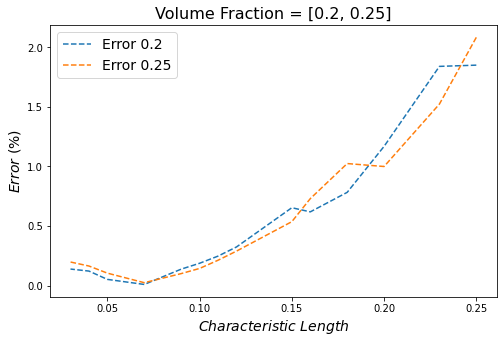

In [5]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
for j in range(len(volume_fraction)):
    ax1.plot(lengths,error[j,:], '--', label='Error {}'.format(volume_fraction[j]))
    ax1.set_xlabel('$Characteristic\ Length$', fontsize=14)
    ax1.set_ylabel('$Error\ (\%)$', fontsize=14)
    ax1.set_title('Volume Fraction = {}'.format(volume_fraction), fontsize=16)
    ax1.legend(loc='best', fontsize=14)
'{:0.2f}'.format(vol_frac)